In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.signal import butter, filtfilt, lfilter, lfilter_zi, detrend

path = r"C:\Users\u117148\surfdrive\Beta\data\RESP\annotatedRESP.txt"
data = np.loadtxt(path)
rawsignal = data[:, -1]

The raw output of the Bitalino breathing belt resembles the derivative of thorax expansion with a DC offset of 400 (a.u.; plotted as horizontal line). On top of the raw breathing signal is an annotation channel (in red) that outputs 1 during inhalation and 0 during exhalation (button-press during inhalation, scaled to the data).

<IPython.core.display.Javascript object>


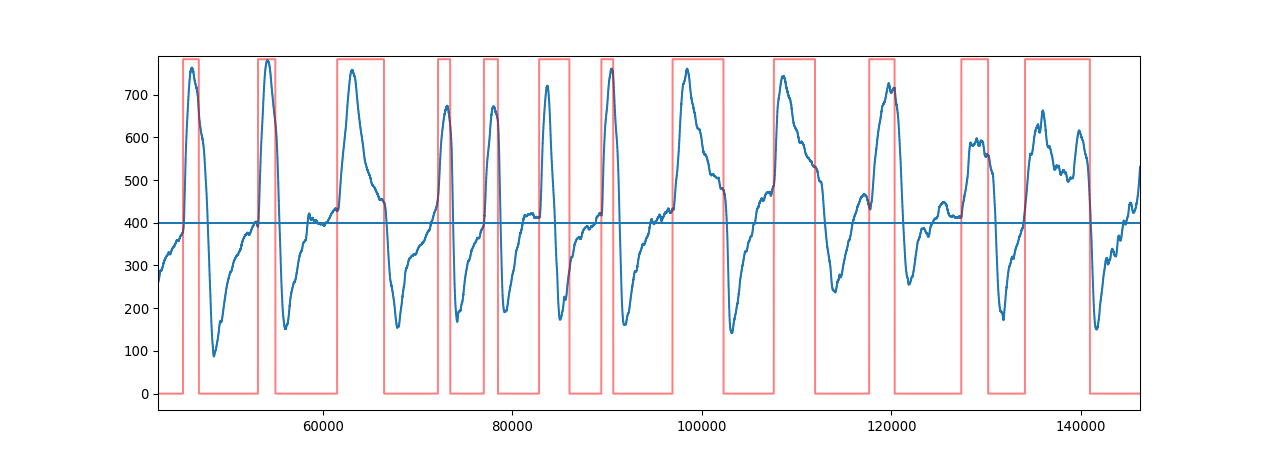

In [17]:
fig, ax = plt.subplots()
ax.plot(rawsignal)
ax.plot(data[:, 1]*max(rawsignal), c='r', alpha=0.5)
ax.axhline(y=400)

Consequently, thorax expansion can be approximated by integrating the raw breathing signal. The top panel again shows the raw signal with overlayed annotation, the bottom panel shows the integral of the raw signal. Note how the inhalation annotation now coincides with the rising signal. For the biofeedback, this means that the raw breathing signal does not need to be derived in order to determined moments of inhalation and exhalation (i.e., determine rise and fall of signal according to it's gradient).

<IPython.core.display.Javascript object>


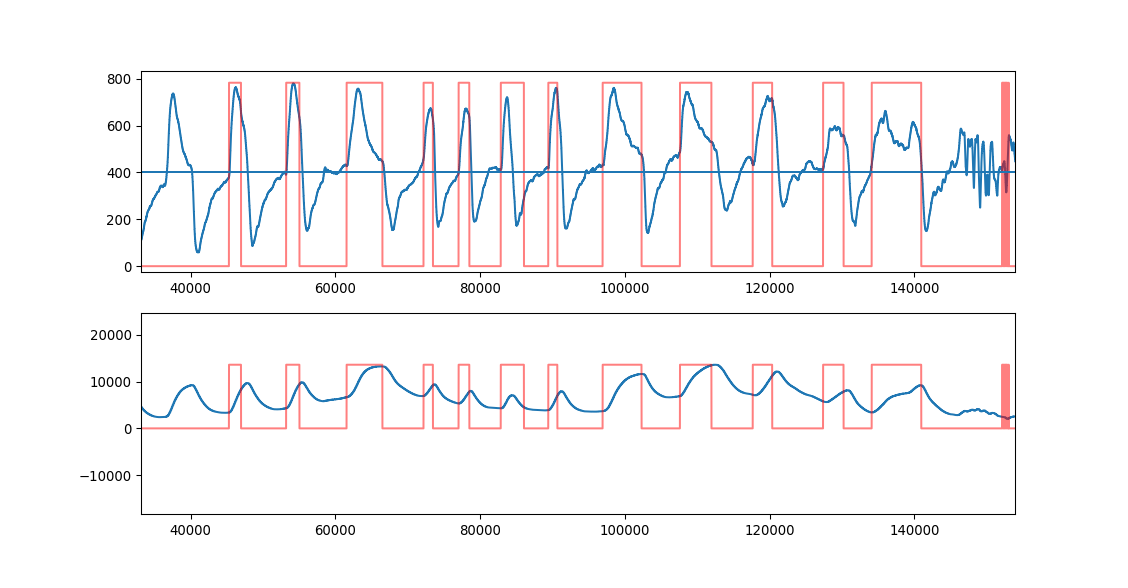

In [21]:
window = int(np.ceil(0.1 * 1000))
window_mean = int(np.ceil(20 * 1000))
integralonline = []
mean = 0
previous = np.zeros(window)
beg = 0
end = window

while end < len(rawsignal):
    
    if end >= window_mean:
        mean = np.mean(rawsignal[end - window_mean:end])
        
    dat = rawsignal[beg:end] 
    current = previous + np.mean(dat) - mean    
    integralonline.extend(current)
    previous = current
    
    beg += window
    end += window
    
integralonline = detrend(integralonline)

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(rawsignal)
ax0.plot(data[:, 1]*max(rawsignal), c='r', alpha=0.5)
ax0.axhline(y=400)
ax1 = fig.add_subplot(212, sharex=ax0)
ax1.plot(detrend(integralonline))
ax1.plot(data[:, 1]*max(integralonline), c='r', alpha=0.5)